<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_Linear_Regression_Complex_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

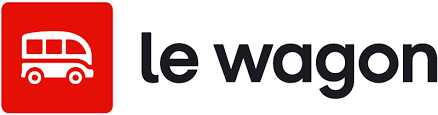

# Predicting house prices

In this challenge, you'll be using your newly acquired Linear Regression skills to try **to predict house prices in Ames, Iowa!**

You'll have to do some more complex preprocessing and when you try to model, things might not go your way...

**Let's get started!**

## Import the Data

Start by importing the data from this link!

[`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing)

Load it into a dataframe!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 11 - Machine Learning LinearRegression/Iowa_housing_prices.csv')

## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset has not been cleaned!

Most important thing to take care of are NA values!

Which columns have missing values?

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### To drop or to fill?

Some columns miss many more values than others!

Typically we would drop columns that have more than 30% missing values. For the others, we would fill them using an imputer. But for now, to keep things simple, let's drop all our missing values.

In [ ]:
df_clean = df.dropna(axis=1)
df_clean.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

## Picking X and y

After cleaning, we are left with 76 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 76 of them!

Assign `X` and `y` appropriately! Keep in mind that we are trying to predict house prices!

In [ ]:
X = df_clean.drop(columns=['SalePrice'])
y = df_clean['SalePrice']

### Train test split
As always, we need to split the data into train and test!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Normalization

We can't skip this step! However, unlike the previous challenge, we now have non-numeric columns as well that we need to take care of!

### Numeric Values

You have to do it only on numerical data!

<details>
    <summary>Hint:</summary>
fit_transform on your train and transform your test.
</details>

In [ ]:
# give me the column names that the dtypes is only int or float
df_clean.select_dtypes(include=['int64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_train_scaled = scaler.fit_transform(X_train[['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])
num_test_scaled = scaler.transform(X_test[['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])
df_num_train_scaled = pd.DataFrame(num_train_scaled, columns=scaler.get_feature_names_out())
df_num_test_scaled = pd.DataFrame(num_test_scaled, columns=scaler.get_feature_names_out())

In [ ]:
# your code

### Non-Numeric Values

Now let's try to do the same for the non-numeric columns! Use `select_dtypes` again and maybe change that `include` to something else? Have a look at the documentation!

After you've selected the non-numeric columns, use `OneHotEncoder` to encode the data!

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output =False)
ohe_train = ohe.fit_transform(X_train.select_dtypes(exclude=['number']))
ohe_test = ohe.transform(X_test.select_dtypes(exclude=['number']))
df_ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out())
df_ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out())

Have a look at your encoded columns.

In [ ]:
df_ohe_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Recreate X
Recreate `X` now by combining (concatenating) the numeric and non-numeric normalized columns together! Call it `X_normalized`!

In [ ]:
X_train_normalized = df_num_train_scaled.join(df_ohe_train, how='inner')
X_test_normamized = df_num_test_scaled.join(df_ohe_test, how='inner')

### Try a Linear Regression

Let's try to use a Linear Regression to model house prices!
Instantiate and fit a model!

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_normalized, y_train)

LinearRegression()

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [ ]:
from sklearn.metrics import mean_absolute_error
y_test_pred = model.predict(X_test_normamized)
mean_absolute_error(y_test, y_test_pred)

18752.846654876863

That's quite a large number and it represents the amount, in the dollars, by which we were wrong about house prices! **Ouch!**

### What went wrong?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever you encounter the limitations of a Linear Regression, there's a couple of things that you could try:

- See if there is not a *numerical* data that are *categorical*
- Remove colinear features
- Apply some regularization techniques
- Try non-linear models


## Improve our model

Let's try with fewer features. Select features that are relevant to predict the SalePrice.
<details>
<summary> Answer:</summary>
We can start with the following features ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']
</details>

In [ ]:
# your code

Split you data.

In [ ]:
# your code

Be sure that you normalize only data you need to normalize.

In [ ]:
# your code

Encode your categorical features.

In [ ]:
# your code

In [ ]:
# your code

Let's try again with a Linear regression.

In [ ]:
# your code

If you choose the right columns, you could see an improvement between `$30,000` and `$40,00`. That's a significant enhancement.

So, it is very important to understand the data you use.

# Optional

All of the above are out of scope for the DA bootcamp, but it's worth knowing about them! We've coded a cell below that uses a **Random Forest Model** to predict house prices! Try to see if you can make some sense of it.

P.S.: You might need to adjust some variable names if we weren't able to guess them right.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#X_train = # your code
#X_test = # your code
#y_train = # your code
#y_test = # your code


rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train_normalized, y_train)
y_pred_rf = rf.predict(X_test_normamized)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

17782.36821917808

The new MAE should be somewhere around $19,000 now, which is a much more acceptable error for a house price!